In [1]:
import datetime

from baec.measurements.io.basetime import BaseTimeBucket, Credentials
from baec.measurements.measured_settlement_series import MeasuredSettlementSeries
from baec.measurements.io.zbase import measurements_from_zbase
from baec.measurements.measured_settlement_series import MeasuredSettlementSeries
from baec.model.fitcore import FitCoreModelGenerator2, FitCoreModel, FittingParameters

from nuclei.client import NucleiClient

from pprint import pprint


In [2]:
# Get credentials from environment variables
basetime_credentials = Credentials()
cems_nuclei_client = NucleiClient()

In [3]:
# Create base time bucket to request data to Basetime
basetime_bucket = BaseTimeBucket(
    credentials=basetime_credentials,
    s3bucket="baec",
)

# Request data for a given company, project and rod_id
measurement_series = basetime_bucket.make_settlement_rod_measurement_series(
    company="Demo",
    project="Hansweert",
    rod_id="269-4",
)

# Visualize the measurements
fig = measurement_series.plot_xyz_time()
fig.set_size_inches(15, 7.5)

ValueError: The AWS Access Key ID you provided does not exist in our records.

In [7]:
import os
os.environ["BASETIME_ACCESS_KEY"]

'A7CWWu1mXbySSFM08rX+PDy7oO4vgOH5LfyAHvFv'

In [5]:
# Create settlement series from measurements
settlement_series = MeasuredSettlementSeries(
    series=measurement_series,
    start_date_time=datetime.datetime(2024, 1, 2),
)

# Visualize the settlements
fig = settlement_series.plot_fill_settlement_time()
fig.set_size_inches(15, 7.5)

NameError: name 'measurement_series' is not defined

#### Fit Model 1

In [5]:
# Create a simple Koppejan model generator. This will be used to fit models.
model_generator = FitCoreModelGenerator2(
    base_model=FitCoreModel.default(),
    fitting_parameters=FittingParameters.all_free(),
    client=cems_nuclei_client,
)

In [6]:
# Fit the model to the settlement series
fitted_model = model_generator.fit(settlement_series)
pprint(fitted_model)

FittedFitCoreModel(model=FitCoreModel(primarySettlement=99.99999999999999,
                                      shift=5.402857963006225e-54,
                                      hydrodynamicPeriod=124.64236252997023,
                                      finalSettlement=2.935128063969837,
                                      client=<nuclei.client.main.NucleiClient object at 0x7f11c944bce0>,
                                      measured_settlements=None),
                   measured_settlements=<baec.measurements.measured_settlement_series.MeasuredSettlementSeries object at 0x7f11c8559be0>,
                   predicted_settlements=None)


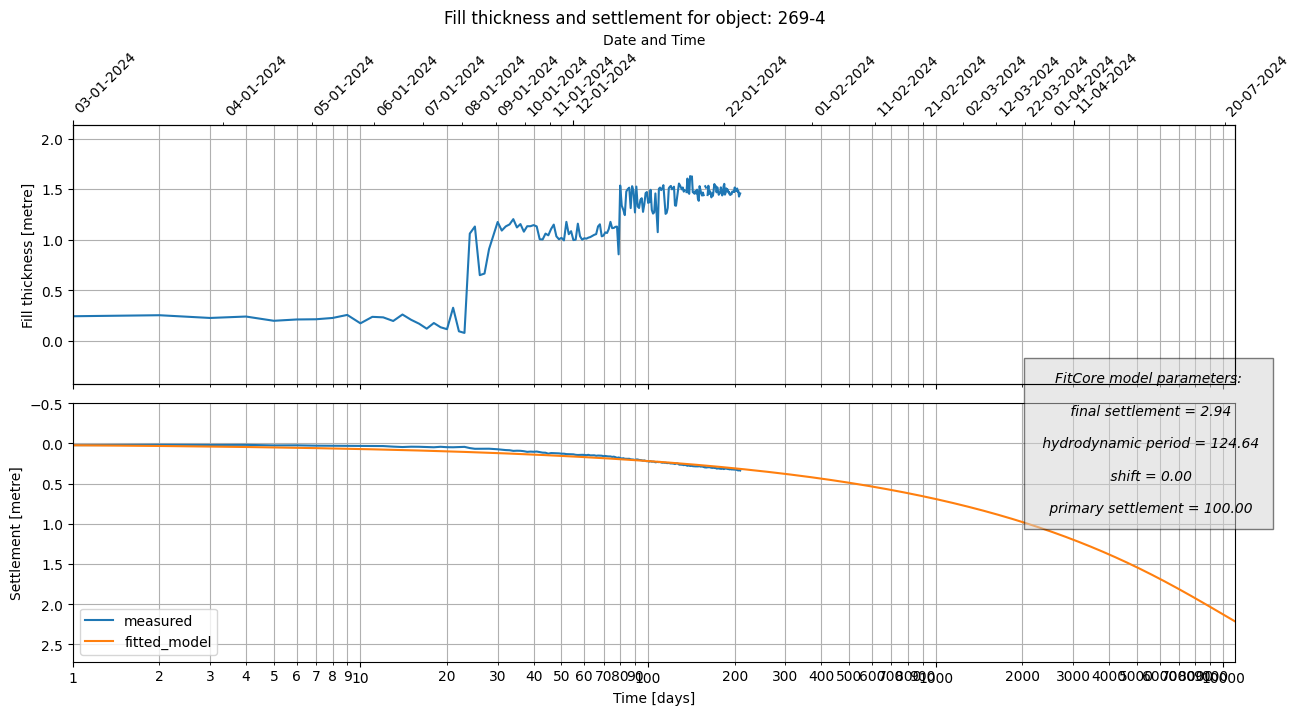

In [7]:
# Predict using the fitted model
fitted_model.predict(end_days_or_datetime=11000.0)

# Plot measured vs. fitted model predictions
fig = fitted_model.plot_fill_settlement_time()
fig.set_size_inches(15, 7.5)

#### Fit Model 2

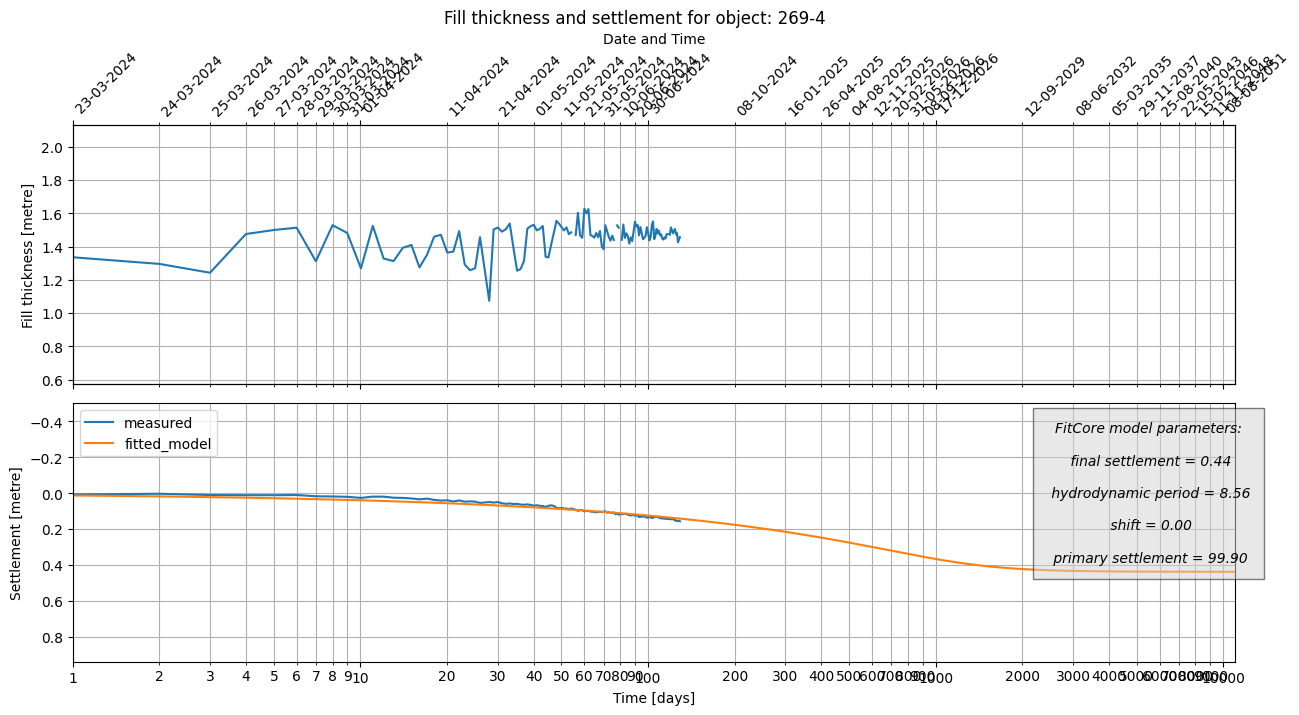

In [8]:
# Create a simple Koppejan model generator. This will be used to fit models.
base_model = FitCoreModel.default()
base_model.primarySettlement = 99.9  # %

model_generator = FitCoreModelGenerator2(
    base_model=base_model,
    fitting_parameters=FittingParameters.all_free_except(["primarySettlement"]),
    client=cems_nuclei_client,
)

# Fit the model to the settlement series
settlement_series.start_date_time = datetime.datetime(2024, 3, 22)
fitted_model = model_generator.fit(settlement_series)

# Predict using the fitted model
fitted_model.predict(end_days_or_datetime=11000.0)

# Plot measured vs. fitted model predictions
fig = fitted_model.plot_fill_settlement_time()
# fig.axes[1].set_ylim(bottom=0.4)
for ax in fig.axes:
    ax.set_xlim(right=11000.0)
fig.set_size_inches(15, 7.5)